In [ ]:
# Download the library
!pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 22.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6d5e1e7e9acf69c7d41286520bf49fd248ed8ca33bbf805f66ae7d40abf4f038
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=b427128dd3f0c1f4dbcfdfb9c1d583060679193a3886bcff61a02be096b611e8
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
# Loading the dataset
# Using pandas
import numpy as np
import pandas as pd
import math
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder




#Data exploration#

In [ ]:
# Reading dataset
dataset = pd.read_table('ratings.dat', header = None, sep = '::', engine = 'python', usecols = [0,1,2], names = ('UserID','MovieID', 'Ratings'))

print(df.describe().apply(lambda s: s.apply('{0:.1f}'.format)))

fig, (ax1, ax2) = plt.subplots(2)

#User Exploratory data

#User entries
df = dataset
df2 = df.groupby(['UserID'])['UserID'].count()
df2 = pd.DataFrame(df2)
df2.columns = ["Number_of_entries"]
df2['UserID'] = df2.index
df2 = df2.sort_values(by=['Number_of_entries'])

#Movie Exploratory data

#Movie entries
df = dataset
df3 = df.groupby(['MovieID'])['MovieID'].count()
df3 = pd.DataFrame(df3)
df3.columns = ["Number_of_entries"]
df3['MovieID'] = df3.index
df3 = df3.sort_values(by=['Number_of_entries'])

fig, (ax1, ax2) = plt.subplots(2, figsize = [6.3, 4.3])

ax1.plot(range(df2['Number_of_entries'].shape[0]), df2['Number_of_entries'])
ax1.set_xlabel('Ranked UserIDs')
ax1.set_ylabel('Number of Entries')
ax1.title.set_text('Sorted Number of Entries per UserID')

ax2.plot(range(df3['Number_of_entries'].shape[0]), df3['Number_of_entries'])
ax2.set_xlabel('Ranked MovieIDs')
ax2.set_ylabel('Number of Entries')
ax2.title.set_text('Sorted Number of Entries per MovieID')
fig.tight_layout()
plt.savefig('N_entries.png')
plt.show()

# Preparation of the data #

In [ ]:
dataset_User = pd.read_csv('Usermatrix.csv', header = None, engine = 'python')
dataset_Movie = pd.read_csv('Moviematrix.csv', header = None, engine = 'python')
#dataset_Total = pd.read_csv('total_matrix.csv', header = None, engine = 'python')


In [ ]:
# Get rid of the added indexes
dataset_User = dataset_User.drop(columns = 0)
end_User = dataset_User.drop(labels = 0)

In [ ]:
# Get rid of the added indexes
# and Transpose for the dimensions reduction
dataset_Movie = dataset_Movie.drop(columns = 0)
end_Movie = dataset_Movie.drop(labels = 0)
end_Movie = end_Movie.T

In [ ]:
# Import dataset for ratings
dataset = pd.read_table('ratings.dat', header = None, sep = '::', engine = 'python', usecols = [0,1,2], names = ('UserID','MovieID', 'Ratings'))

In [ ]:
# Import the info for user and movies
df_movies = pd.read_table('movies.dat', sep = '::', engine = 'python', header = None, names = ('MovieID','Title', 'Genres'), encoding = "ISO-8859-1")
df_users = pd.read_table('users.dat', sep = '::', engine = 'python', header = None, names = ('UserID','Gender','Age','Occupation','Zip-code'), encoding = "ISO-8859-1")
df_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
# Seperate year from the title 
df_movies['Year'] = df_movies.Title.str.extract("\((\d{4})\)", expand=True)
df_movies.Year = pd.to_datetime(df_movies.Year, format='%Y')
df_movies.Year = df_movies.Year.dt.year

In [ ]:
uniquemovieID = dataset['MovieID'].unique()
moviesids = {o:i for i,o in enumerate(uniquemovieID)}

df_movies['moviesIDindexmatrix'] = [moviesids[i] if i in moviesids else np.nan for i in df_movies.MovieID ]

In [ ]:
genres = ['Action', 'Adventure','Animation', 'Childrens' , 'Comedy', 'Crime', 'Documentary','Drama','Fantasy',
          'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller', 'War', 'Western']

In [ ]:
labeldata = LabelEncoder()

In [ ]:
df_users['Gender'] = labeldata.fit_transform(df_users['Gender'])
df_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455
...,...,...,...,...,...
6035,6036,0,25,15,32603
6036,6037,0,45,1,76006
6037,6038,0,56,1,14706
6038,6039,0,45,0,01060


In [ ]:
# get all the unique genres into the dataframe labelled by 0 and 1
genres_unique = pd.DataFrame(df_movies.Genres.str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['Genres_Unique'])

df_movies_try = df_movies.join(df_movies.Genres.str.get_dummies().astype(bool))
df_movies_try.drop('Genres', inplace=True, axis=1)
df_movies_try.iloc[:,4:22] = df_movies_try.iloc[:,4:22]*1

In [ ]:
# Merge Comedy and War, first multiply Comedy by 2 so you see the differences
df_movies_try = df_movies_try.assign(Comedy=lambda x: x.Comedy * 2)
df_movies_try["Compare Comedy & War"] = df_movies_try["Comedy"] + df_movies_try["War"]

# T-SNE - Visualization

## Movie Features matrix

In [ ]:
ScaleMovieTSNE = StandardScaler().fit_transform(end_Movie)

In [ ]:
# Transform for TSNE
movie_t_sne = TSNE(n_components=2).fit_transform(ScaleMovieTSNE)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


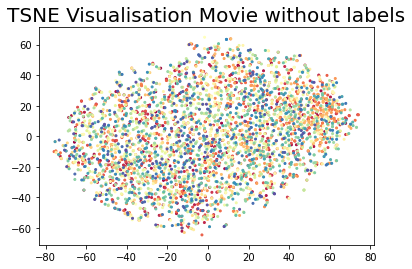

In [ ]:
# Create dataframe with tsne 
tsne_df_movie = pd.DataFrame(movie_t_sne, columns=['tsne1', 'tsne2'])
index = np.array(range(movie_t_sne.shape[0]))
tsne_df_movie['moviesIDindexmatrix'] = index
# Plot
plt.scatter(tsne_df_movie["tsne1"], 
            tsne_df_movie['tsne2'], 
            c =  tsne_df_movie['moviesIDindexmatrix'], 
            cmap='Spectral',
            s = 4)
plt.title('TSNE Visualisation Movie without labels', fontsize = 20)


In [ ]:
# Merge dataframes
tsne_movie_df = pd.merge(tsne_df_movie, df_movies, how='left', on='moviesIDindexmatrix')

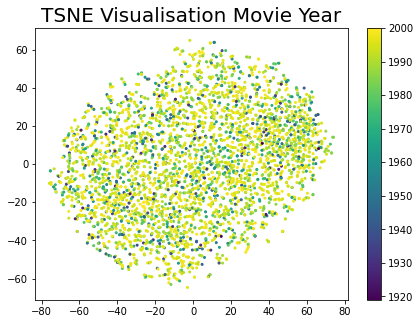

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(tsne_movie_df.tsne1, tsne_movie_df.tsne2, c=tsne_movie_df.Year, s = 4)
plt.title('TSNE Visualisation Movie Year', fontsize = 20)
cbar = fig.colorbar(pts)


In [ ]:
# Compare Genres Comedy & War 
tsne_movie_df_try = pd.merge(tsne_df_movie, df_movies_try, how='left', on='moviesIDindexmatrix')

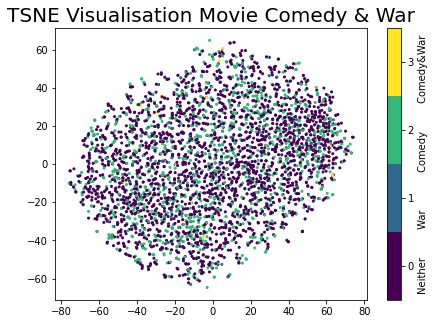

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(tsne_movie_df_try.tsne1, tsne_movie_df_try.tsne2, c=tsne_movie_df_try[ 'Compare Comedy & War'], s = 4)
plt.title('TSNE Visualisation Movie Comedy & War', fontsize = 20)
cbar = fig.colorbar(pts, boundaries = np.arange(5)-0.5, label = 'Neither         War            Comedy         Comedy&War').set_ticks(np.arange(4))


## User Features matrix

In [ ]:
ScaleUserTSNE = StandardScaler().fit_transform(end_User)

In [ ]:
# Transform with TSNE
user_t_sne = TSNE(n_components=2).fit_transform(ScaleUserTSNE)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


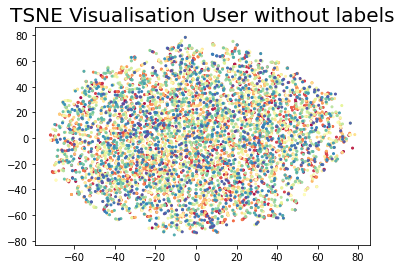

In [ ]:
# Create dataframe with tsne 
tsne_df_user = pd.DataFrame(user_t_sne,
             columns=['tsne1', 'tsne2'])
tsne_df_user['UserID']= dataset['UserID'].unique()

plt.scatter(tsne_df_user["tsne1"], 
            tsne_df_user['tsne2'], 
            c =  tsne_df_user['UserID'], 
            cmap='Spectral',
            s = 4)
plt.title('TSNE Visualisation User without labels', fontsize = 20)


In [ ]:
# Merge dataframes
tsne_user_df = pd.merge(tsne_df_user, df_users, how='left', on='UserID')

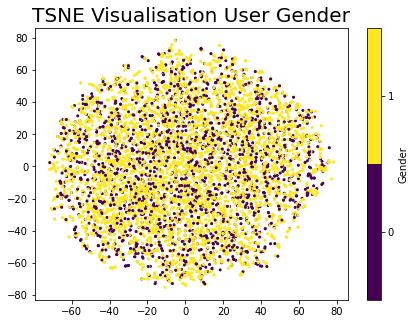

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(tsne_user_df.tsne1, tsne_user_df.tsne2, c=tsne_user_df.Gender, s = 4)
plt.title('TSNE Visualisation User Gender', fontsize = 20)
cbar = fig.colorbar(pts, boundaries = np.arange(3)-0.5, label = 'Gender').set_ticks(np.arange(2))


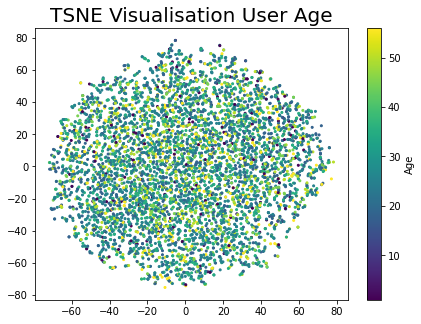

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(tsne_user_df.tsne1, tsne_user_df.tsne2, c=tsne_user_df.Age, s = 4)
plt.title('TSNE Visualisation User Age', fontsize = 20)
cbar = fig.colorbar(pts, label = 'Age')


# UMAP - Visualization 

## Movie Features matrix

In [ ]:
ScaleMovieUMAP = StandardScaler().fit_transform(end_Movie)

In [ ]:
# Transform for UMAP
umap_movie = umap.UMAP(n_components=2).fit_transform(ScaleMovieUMAP)

In [ ]:
# Create dataframe 
umap_df_movie = pd.DataFrame(umap_movie,
             columns=['umap1', 'umap2'])
index = np.array(range(movie_t_sne.shape[0]))
umap_df_movie['moviesIDindexmatrix'] = index

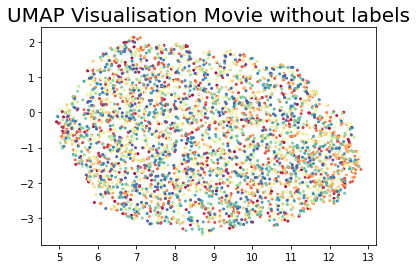

In [ ]:
# Visualisation of the UMAP
plt.scatter(umap_df_movie['umap1'], 
            umap_df_movie['umap2'], 
            c =  umap_df_movie['moviesIDindexmatrix'], 
            cmap='Spectral',
            s = 4)
plt.title('UMAP Visualisation Movie without labels', fontsize = 20)


In [ ]:
# Merge Dataframes
umap_movie_df = pd.merge(umap_df_movie, df_movies, how='left', on='moviesIDindexmatrix')

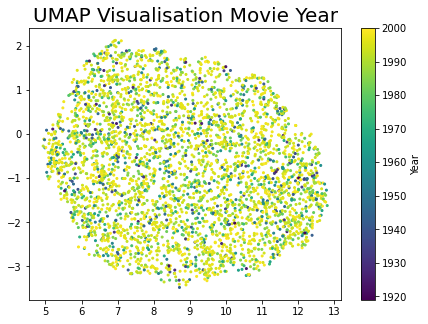

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(umap_movie_df.umap1, umap_movie_df.umap2, c=umap_movie_df.Year, s = 4)
plt.title('UMAP Visualisation Movie Year', fontsize = 20)

cbar = fig.colorbar(pts, label = 'Year')


In [ ]:
# Compare Genres Comedy & War 
umap_movie_df_try = pd.merge(umap_df_movie, df_movies_try, how='left', on='moviesIDindexmatrix')

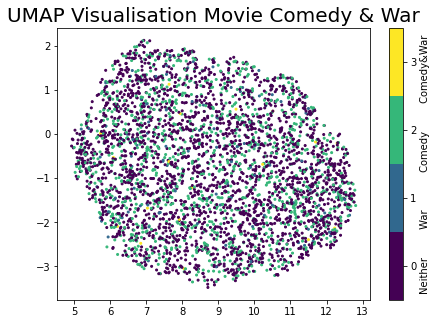

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(umap_movie_df_try.umap1, umap_movie_df_try.umap2, c=umap_movie_df_try[ 'Compare Comedy & War'], s = 4)
plt.title('UMAP Visualisation Movie Comedy & War', fontsize = 20)
cbar = fig.colorbar(pts, boundaries = np.arange(5)-0.5, label = 'Neither         War            Comedy         Comedy&War').set_ticks(np.arange(4))


## User Features matrix

In [ ]:
ScaleUserUMAP = StandardScaler().fit_transform(end_User)

In [ ]:
# Transform for UMAP
umap_user = umap.UMAP(n_components=2).fit_transform(ScaleUserUMAP)

In [ ]:
#Create Dataframe
umap_df_user = pd.DataFrame(umap_user,
             columns=['umap1', 'umap2'])
umap_df_user['UserID']= dataset['UserID'].unique()

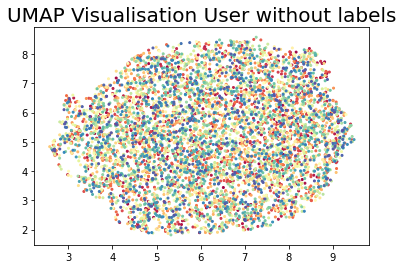

In [ ]:
# Visualisation of the UMAP
plt.scatter(umap_df_user['umap1'], 
            umap_df_user['umap2'], 
            c =  umap_df_user['UserID'], 
            cmap='Spectral',
            s = 4)
plt.title('UMAP Visualisation User without labels', fontsize = 20)


In [ ]:
# Merge Dataframes
umap_user_df = pd.merge(umap_df_user, df_users, how='left', on='UserID')

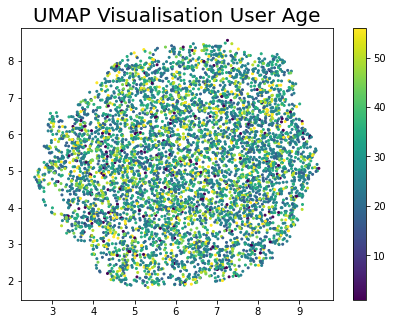

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(umap_user_df.umap1, umap_user_df.umap2, c=umap_user_df.Age, s = 4)
plt.title('UMAP Visualisation User Age', fontsize = 20)
cbar = fig.colorbar(pts)


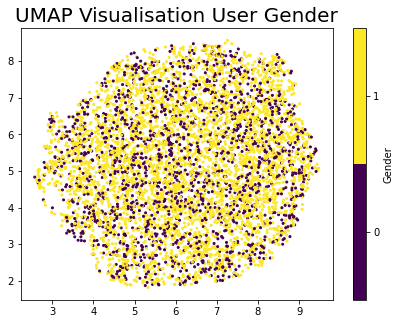

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(umap_user_df.umap1, umap_user_df.umap2, c=umap_user_df.Gender, s = 4)
plt.title('UMAP Visualisation User Gender', fontsize = 20)

cbar = fig.colorbar(pts, boundaries = np.arange(3)-0.5, label = 'Gender').set_ticks(np.arange(2))


# PCA - Visualization 

## Movie Features matrix

In [ ]:
# Scale the data 
scalingMoviePCA = StandardScaler().fit_transform(end_Movie)


In [ ]:
Pca_movie_fit = PCA(n_components=2).fit(scalingMoviePCA)

In [ ]:
#Transform to PCA
PCA_movie = PCA(n_components=2).fit_transform(scalingMoviePCA)


In [ ]:
#Create Dataframe
PCA_df_movie = pd.DataFrame(PCA_movie,
             columns=['pca1', 'pca2'])
index = np.array(range(movie_t_sne.shape[0]))
PCA_df_movie['moviesIDindexmatrix'] = index

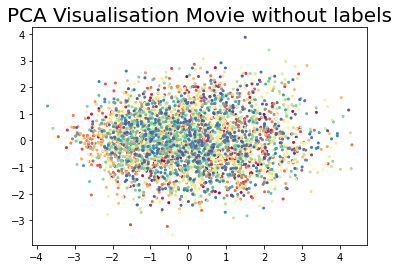

In [ ]:
# Visualisation of the PCA
plt.scatter(PCA_df_movie['pca1'], 
            PCA_df_movie['pca2'], 
            c =  PCA_df_movie['moviesIDindexmatrix'], 
            cmap='Spectral',
            s = 4)
plt.title('PCA Visualisation Movie without labels', fontsize = 20)


In [ ]:
# Merge Dataframes
pca_movie_df = pd.merge(PCA_df_movie, df_movies, how='left', on='moviesIDindexmatrix')

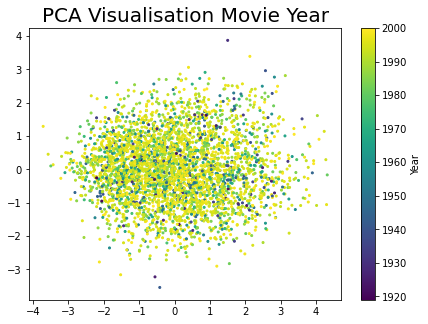

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(pca_movie_df.pca1, pca_movie_df.pca2, c=pca_movie_df.Year, s = 4)
plt.title('PCA Visualisation Movie Year', fontsize = 20)
cbar = fig.colorbar(pts, label = 'Year')


In [ ]:
# Compare Genres Comedy & War 
pca_movie_df_try = pd.merge(PCA_df_movie, df_movies_try, how='left', on='moviesIDindexmatrix')

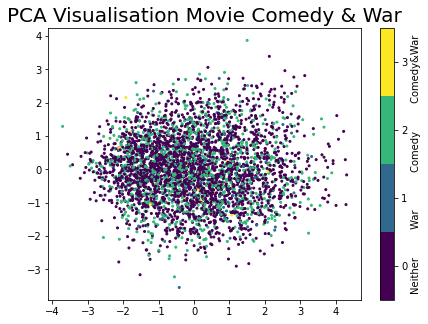

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(pca_movie_df_try.pca1, pca_movie_df_try.pca2, c=pca_movie_df_try[ 'Compare Comedy & War'], s = 4)
plt.title('PCA Visualisation Movie Comedy & War', fontsize = 20)
cbar = fig.colorbar(pts, boundaries = np.arange(5)-0.5, label = 'Neither         War            Comedy         Comedy&War').set_ticks(np.arange(4))


## User Features matrix

In [ ]:
# Scale data 
scalingUserPCA = StandardScaler().fit_transform(end_User)

In [ ]:
# Transform for PCA
PCA_user = PCA(n_components=2).fit_transform(scalingUserPCA)


In [ ]:
#Create Dataframe
PCA_df_user = pd.DataFrame(PCA_user,
             columns=['pca1', 'pca2'])
PCA_df_user['UserID']= dataset['UserID'].unique()

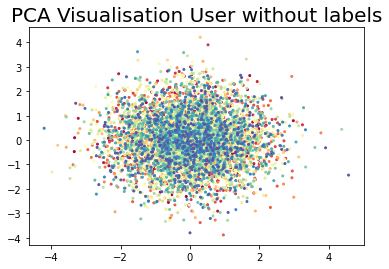

In [ ]:
# Visualisation of the PCA
plt.scatter(PCA_df_user['pca1'], 
            PCA_df_user['pca2'], 
            c =  PCA_df_user['UserID'], 
            cmap='Spectral',
            s = 4)
#plt.colorbar(boundaries = np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA Visualisation User without labels', fontsize = 20)


In [ ]:
# Merge Dataframes
pca_user_df = pd.merge(PCA_df_user, df_users, how='left', on='UserID')

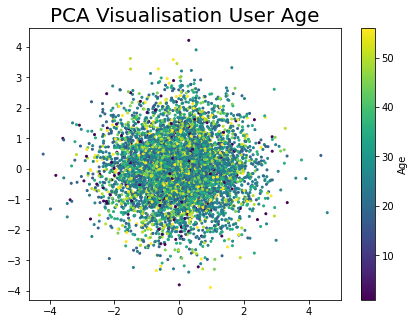

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(pca_user_df.pca1, pca_user_df.pca2, c=pca_user_df.Age, s = 4)
plt.title('PCA Visualisation User Age', fontsize = 20)
cbar = fig.colorbar(pts, label = 'Age')


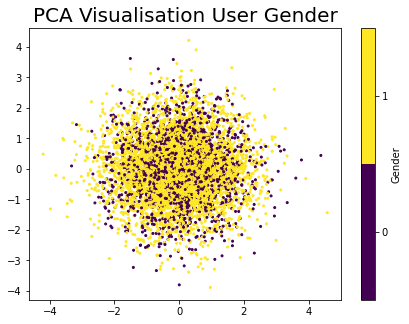

In [ ]:
size = (7, 5)
fig, ax = plt.subplots(figsize=size)

pts = ax.scatter(pca_user_df.pca1, pca_user_df.pca2, c=pca_user_df.Gender, s = 4)
plt.title('PCA Visualisation User Gender', fontsize = 20)
cbar = fig.colorbar(pts, boundaries = np.arange(3)-0.5, label = 'Gender').set_ticks(np.arange(2))